# Wizard Standoff Riddle

Using recursive programming

In [1]:
import copy
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as graph

from tqdm import tqdm
from itertools import cycle
from IPython.display import YouTubeVideo

graph.style.use('fivethirtyeight')

data = {'me': 0.6, 2: 0.7, 3: 0.9}

def get_max(d):
    who_max = ''
    prob_max = 0
    for who in d:
        if d[who] > prob_max:
            who_max, prob_max = who, d[who]
    return who_max


def combat_dict(di, *attacker):
    cdi = di.copy()
    for atk in attacker:
        cdi.pop(atk)
    return cdi

get_random = stats.uniform().rvs

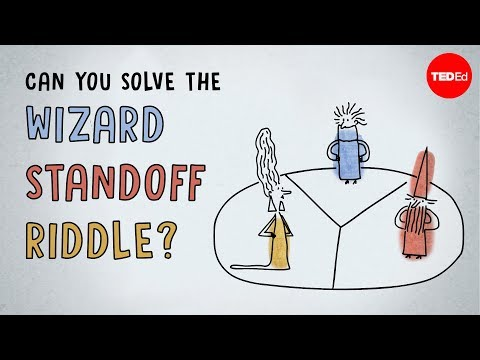

In [2]:
YouTubeVideo('mmkCS5eA4f8', width=720, height=480)

In [3]:
print(get_max(data))
print(combat_dict(data, 3))
print(combat_dict(data, 'me', 3))
print('me' in data.keys())

3
{'me': 0.6, 2: 0.7}
{2: 0.7}
True


In [4]:
### Graph!! ###
def fight(d, attacker):
    def get_next_attacker(di):
        cycler = cycle(di.keys())
        for who in cycler:
            if who == attacker:
                break
        return next(cycler)
    
    # Handle end game state
    if len(d.keys()) == 1 and 'me' in d.keys():
        return 1
        
    # Fight
    if get_random() <= d[attacker]:
        # Win
        cd = combat_dict(d, attacker)
        target = get_max(cd)
        d.pop(target)
        
        if 'me' in d:
            return fight(d, get_next_attacker(d))
        else:
            # I just died :(
            return 0
    else:
        # Lose
        return fight(d, get_next_attacker(d))

In [5]:
# Simulate
n_wins, n_trials = 0, 100000
for _ in tqdm(range(n_trials)):
    data_i = data.copy()
    n_wins += fight(data_i, 2)

print(n_wins / n_trials)

100%|██████████| 100000/100000 [00:08<00:00, 12104.69it/s]

0.65613
